# HW2  Regression Fun Time!
## Nikhil Pande

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Please run the cell below to import libraries needed for this HW. Please use the autograd numpy, otherwise you will have issues.

In [80]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline


Q1) **[10 points]**

Implement the linear regression model discussed in class below. The function (called model) takes in an array of data points, x , and an array of weights, w, and returns a vector y_predicted containing the linear combination for each of the data points. This is the linear model we have discussed in class. You can assume each data point in x only has one feature.  The length of the vector being returned should be the same as x.


In [81]:
def model(x,w):
    #your code here
    # dot product
    y_predicted = np.dot(x.T, w[1:]) + w[0]


    return y_predicted

Q2) **[10 ponts]**

Implement the least squares function discussed in class below. The function should take in an array of weights, w, an array of x's and an array of ys. It should use the model function implemented above and return a float indicating the total cost.

In [82]:
def least_squares(w,x,y):

    # use model to predict
    y_predicted = model(x, w)

    # Calculate the squared differences
    squared_diff = np.square(y - y_predicted)

    # aggregate
    cost = np.sum(squared_diff) / y.size

    return cost

Q3) **[5 point]**

This one is a freebie from HW1. Copy and paste your gradient descent function here. Specifically, the one that takes in the cost function as input and return the weight and cost history. We will be using a fixed alpha for this HW. The only difference is that this function should now also take in as input an array of x and ys, corresponding to our data. The w,x, and y are given as inputs to the cost funtion and its gradient.

In [83]:
def gradient_descent(g, alpha, max_its, w, x, y):
    # gradient.
    gradient = grad(g) # This is how you use the autograd library to find the gradient of a function.

    # Initialize the weight and cost history.
    weight_history = []
    cost_history = []

    weight_history.append(w)
    cost_history.append(g(w, x, y))

    # Apply the gradient descent, according to the slope (determined by the 'weight', gradient, and alpha).
    for k in range(1, max_its):
      weight_history.append(weight_history[k - 1] - alpha * gradient(weight_history[k - 1], x, y))
      cost_history.append(g(weight_history[k], x, y))

    return weight_history, cost_history


Q4) **[1 points]**  
Run the code below to import a dataset. Then, plot a scatter plot of the data (x vs y).

In [84]:
# import the dataset
## Carefully check the path
csvname = '/content/drive/MyDrive/HW2/kleibers_law_data.csv'
data = np.loadtxt(csvname, delimiter=',')
x = np.log(data[:-1,:])
y = np.log(data[-1:,:])


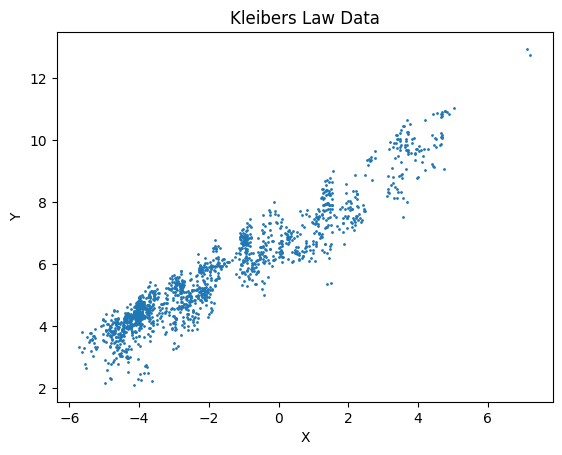

In [85]:
#Your code here

fig, ax = plt.subplots()

ax.scatter(x, y, s=1)

# Add labels and a title.
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Kleibers Law Data')

plt.show()


Q5) **[10 points]**

[Part 1] Use your gradient descent function to learn a linear regression model for the x and y above using the following parameters and plot the cost_history over the 1000 iterations

g = least_squares function you implemented

w = [w_0, w_1]  , where w_0 and w_1 are random numbers between -0.1 and 0.1

max_its=1000

alpha=0.01

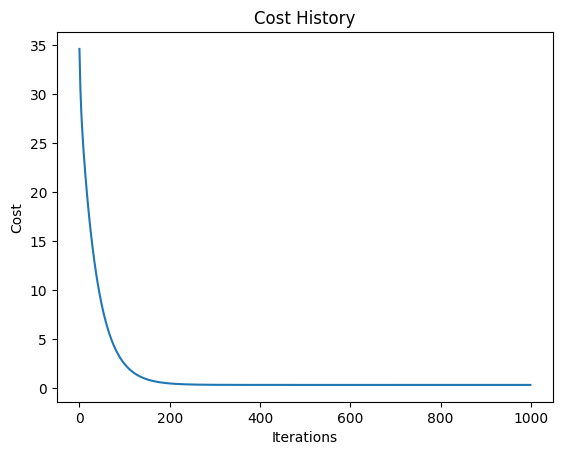

In [86]:
#Your code here

# Parameters
w = np.random.uniform(-0.1, 0.1, 2)  # Random initial weights
alpha = 0.01
max_its = 1000

weight_history1, cost_history1 = gradient_descent(least_squares, alpha, max_its, w, x, y)


plt.figure()
plt.plot(range(max_its), cost_history1)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost History")
plt.show()

Q5) [Part 2]

Use the learned weights from above (note that the "learned" weights are the ones with the lowest cost) to plot the learned line. You can use the linspace method (shown below) to generate a list of xs that you can use for plotting. You need to generate a y for each of the candidate xs using the learned weights. On the same figure, also plot the scatter plot from Q4.


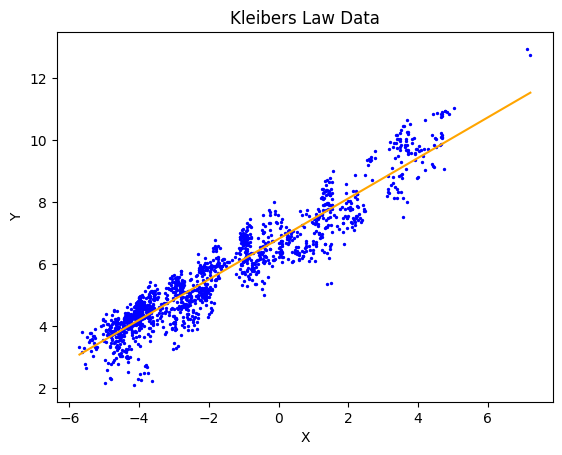

In [87]:
s = np.linspace(np.min(x),np.max(x))
#Your code here

final_w = weight_history1[-1]

y_predicted = final_w[1] * s + final_w[0]

fig, ax = plt.subplots()

# Plot the data as a scatter plot ('x' vs. 'y').
ax.scatter(x, y, s = 2, color = 'blue')
ax.plot(s, y_predicted, color = 'orange')

# Add labels and a title.
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Kleibers Law Data')

# Show the plot.
plt.show()


Q6) **[1 points]**  

Run the code below to import a dataset. Then, plot a scatter plot of the data (x vs y).

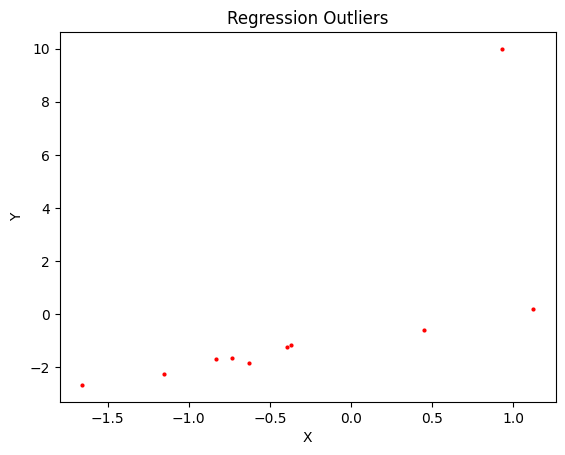

In [97]:
# load in dataset
data = np.loadtxt('/content/drive/MyDrive/HW2/regression_outliers.csv', delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]
#Your code here

fig, ax = plt.subplots()

ax.scatter(x, y, color = 'red', s = 4)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Regression Outliers')

plt.show()

Q7) **[10 ponts]**

 Implement the least absolute deviations function discussed in class. The function should take in an array of weights, w, an array of x's and an array of ys. It should use the model function implemented in Q1  and return a float indicating the total cost.

In [98]:
def least_absolute_deviations(w,x,y):
    #your code here
    # same thing as least squares but with absolute value

    # use model
    y_predicted = model(x, w)

    # differences from actual, square them
    abs_diff = np.absolute(y - y_predicted)

    # aggregate
    cost = np.sum(abs_diff) / y.size

    return cost


 Q8) **[10 points]**

[Part 1] Use the gradient descent function twice to learn two linear models using the new x and y from Q6 using the following parameters and plot the cost_history for both runs on the same plot. Make the plot for the first run blue and the plot for the second run red.

Run 1)
g = least_squares function

w = [1.0,1.0]

max_its=100

alpha=0.1

Run 2)
g = least_absoulte_deviations

w = [1.0,1.0]

max_its=100

alpha=0.1


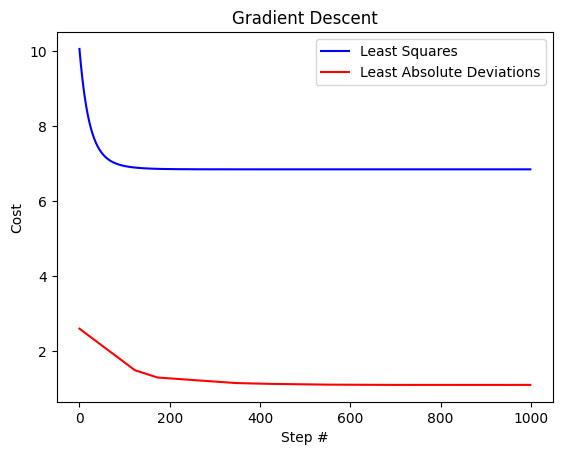

In [99]:
# initialize parameters
w = np.array([1.0, 1.0])
max_its1 = 100
alpha1 = 0.1

weight_history2, cost_history2 = gradient_descent(least_squares, alpha, max_its, w, x, y)
weight_history3, cost_history3 = gradient_descent(least_absolute_deviations, alpha, max_its, w, x, y)

fig, ax = plt.subplots()

# Plot the cost history as a line graph.
ax.plot(cost_history2, label = 'Least Squares', color = 'blue')
ax.plot(cost_history3, label = 'Least Absolute Deviations', color = 'red')

# Add labels and a title.
ax.set_xlabel('Step #')
ax.set_ylabel('Cost')
ax.set_title('Gradient Descent')
ax.legend()

# Show the plot.
plt.show()


Q8) **[Part 2]**

 Use the learned weights from above to plot the two learned lines (use same colors as above). You can use the linspace method again to generate a list of xs that you can use. On the same figure, also plot the scatter plot from Q6. Which of these lines look like a better fit to you?


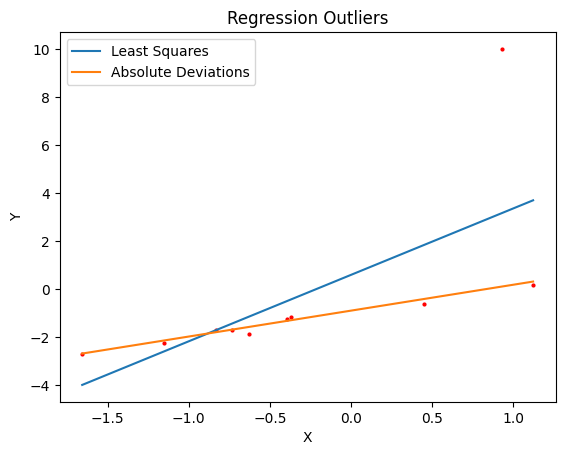

In [100]:
s = np.linspace(np.min(x),np.max(x))

final_w_ls = weight_history2[-1]
final_w_abs = weight_history3[-1]

y_predicted_ls = final_w_ls[1] * s + final_w_ls[0]
y_predicted_abs = final_w_abs[1] * s + final_w_abs[0]



fig, ax = plt.subplots()

ax.scatter(x, y, color = 'red', s = 4)
ax.plot(s, y_predicted_ls, label = 'Least Squares')
ax.plot(s, y_predicted_abs, label = 'Absolute Deviations')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Regression Outliers')
plt.legend()

plt.show()

In this case, it seems like the absolute deviations line (orange) is the better fit for the data. The least squares line (blue) skews from the data toward the end, and this is due to the one major outlier in the dataset. As we talked about in class, least squares models are not robust to outliers, because squaring the error amplifies its importance and weight.

However, when we construct a model based on absolute deviations, the cost is reduced for the majority of the dataset, while a few outliers still exist. While the least squares model overfits the data, this absolute deviations model is robust to outliers (as can be seen above) and is a better fit overall.

Q9) **[10 points]**

[Part 1] Implement the mean squared error (MSE) and the mean absolute deviation functions from class. The functions should take in as input an array of actual ys and an array of predicted ys and return the prediction error.

In [101]:
def MSE(y_actual,y_pred):
    # compute squared error
    error = y_pred - y_actual
    squared_error = np.square(error)

    # aggregate
    error = np.sum(squared_error) / y_actual.size

    return error

def MAD(y_actual,y_pred):
    # compute absolute error
    error = y_pred - y_actual
    absolute_error = np.absolute(error)

    # aggregate
    error = np.sum(absolute_error) / y_actual.size

    return error


Q9) [Part 2]
Use the functions above to report the MSE and MAD for the two models learned in Q8 [Part 1], using the x and y from Q6. You should have 4 values total, two for each model. Which model is doing better? (Note that since you are evaluating the model on the training data, this corresponds to the training error)

In [104]:
#Your code here
final_w_ls = weight_history2[-1]
final_w_abs = weight_history3[-1]

y_pred_ls = final_w_ls[1] * x + final_w_ls[0]
y_pred_abs = final_w_abs[1] * x + final_w_abs[0]

# compute mse and mad of ls model
mse_ls = MSE(y, y_pred_ls)
mad_ls = MAD(y, y_pred_ls)

# compute mse and mad of abs_dev model

mse_abs = MSE(y, y_pred_abs)
mad_abs = MAD(y, y_pred_abs)

print("LEAST SQUARES:")
print("MSE: " + str(mse_ls))
print("MAD: " + str(mad_ls))

print("----------------------------")

print("ABSOLUTE DEVIATIONS")
print("MSE: " + str(mse_abs))
print("MAD: " + str(mad_abs))

LEAST SQUARES:
MSE: 6.841394300709702
MAD: 1.6893691773689157
----------------------------
ABSOLUTE DEVIATIONS
MSE: 9.782884521538625
MAD: 1.0911594767311648


The question of which model is doing better depends on which error metric we use. On one hand, when we use Mean Squared Error, the least squares model does better, because that metric was used in its learning. The effects of the large outlier are somewhat mitigated under MSE for the least squares model.

However, when we measure using Mean Absolute Deviations, we conclude that the absolute deviations model is better. Despite the fact that there is a large error from the outlier, the other errors are so small that this model wins out under this metric.

Q10) **[6 points]**

 Implement the L1 and L2 regularizers from class. Recall the regularizers take in input the weight vector and return a score based on the L1 or L2 norm of the weights

In [105]:

def L2_regularizer(w):
    # sum of squared weights
    L2 = np.sum(np.square(w))

    return L2

def L1_regularizer(w):
    # sum of absolute weights.
    L1 = np.sum(np.absolute(w))

    return L1

Q11) **[12 points]**

Turn the least squares function implemented in Q2 into the Ridge (L2) and Lasso (L1) least squares (covered in class) using the functions implemented in Q10. Recall that $\lambda$ is used as a hyperparameter to specify the smoothness of the function learned (higher $\lambda$ leads to simpler and smoother functions whereas lower $\lambda$ leads to better fitting to the data. $\lambda=0$ is the same as non-regularized least-squares)

In [ ]:
def ridge(w, x, y, lmbda):
    # Compute the cost and regularize via L2.
    least_squares_cost = least_squares(w, x, y)
    L2_cost = L2_regularizer(w)

    # smooth with lambda
    cost = least_squares_cost + (lmbda * L2_cost)

    return cost

def lasso(w, x, y, lmbda):
    # Compute the cost and regularize via L1
    least_squares_cost = least_squares(w, x, y)
    L1_cost = L1_regularizer(w)

    # smooth with lambda.
    cost = least_squares_cost + (lmbda * L1_cost)

    return cost

## For the remaining questions we will work with `weatherHistory.csv` dataset

The file 'weatherHistory.csv'has 96,454 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns. Read the data file. Note that the first line is the header describing each column.

In [109]:
#Your code here
data = np.loadtxt('/content/drive/MyDrive/HW2/weatherHistory.csv', delimiter = ',', dtype = str)

pd.DataFrame(data)



,0,1,2,3,4,5,6,7,8,9,10,11
0,Date,Summary,Precip,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Loud_Cover,Pressure,Daily_Summary
1,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222222222221,7.3888888888888875,0.89,14.1197,251.0,15.826300000000002,0.0,1015.13,Partly cloudy throughout the day.
2,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355555555555558,7.227777777777776,0.86,14.2646,259.0,15.826300000000002,0.0,1015.63,Partly cloudy throughout the day.
3,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377777777777778,9.377777777777778,0.89,3.9284000000000003,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
4,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.28888888888889,5.944444444444446,0.83,14.1036,269.0,15.826300000000002,0.0,1016.41,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96449,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016666666666666,26.016666666666666,0.43,10.996300000000002,31.0,16.1,0.0,1014.36,Partly cloudy starting in the morning.
96450,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333333333332,24.583333333333332,0.48,10.0947,20.0,15.552600000000002,0.0,1015.16,Partly cloudy starting in the morning.
96451,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.03888888888889,22.03888888888889,0.56,8.9838,30.0,16.1,0.0,1015.66,Partly cloudy starting in the morning.
96452,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222222222222,21.522222222222222,0.6,10.5294,20.0,16.1,0.0,1015.95,Partly cloudy starting in the morning.


 Use the data above to set y to be the temperatures and X to be the following columns (in order): [Apparent_Temperature, Humidity, Wind_Speed, Wind_Bearing, Visibility, Pressure] Basically, we want to see whether we can predict the temperature, using the features in X.

In [114]:
#Your code here
print(data[0])
# so the fourth column (idx 3) is the temperature, and other relevant columns are [4, 5, 6, 7, 8, 10]

Y = data[1:, 3].astype(float)
X = data[1:, [4, 5, 6, 7, 8, 10]].astype(float)




['Date' 'Summary' 'Precip' 'Temperature' 'Apparent_Temperature' 'Humidity'
 'Wind_Speed' 'Wind_Bearing' 'Visibility' 'Loud_Cover' 'Pressure'
 'Daily_Summary']


We are now going to using a well-known ML library called sklearn. If you do not have it installed, please do so using this instruction: https://scikit-learn.org/stable/install.html

sklearn comes with many models already implemented, below we import the standard linear regression, Ridge, and Lasso models from sklearn. We also import a method that can divide our data into train/test sets. Please run the cell below.

In [115]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

This library is very easy to use. We briefly went over it in the class but please use the API and user guide  ( https://scikit-learn.org) to learn exactly how to use this library.

For instance, learning a linear regression model using sklearn can be done in two lines:

linearModel = LinearRegression()

linearModel.fit(x_train, y_train)

Use the train_test_split to divide your modified data into 80% train, 20% test.

In [116]:
#Your code here

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)


Q12) **[8 points]**

Use sklearn to train a LinearRegression model using the data above. Report the performance of the model on the test data (use sklearn's MSE implementation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). Note that the .predict method can be used to get the y_predictions for the test xs.

In [120]:
from sklearn.metrics import mean_squared_error
#Your code here

# initialize, fit, predict
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_test)

# print error
print("MSE Error for LR: " + str(mean_squared_error(Y_test, lr_predictions)))


MSE Error for LR: 0.9000557948711271


Q13) **[7 points]**

Repeat Q12 but instead of LinearRegression, use the Ridge and Lasso functions. You can keep the default alpha (note that what we called lambda in the class, the hyperparameter for regularization, is called alpha in sklearn. It is the same thing).

Print the learned parameters for the Ridge and Lasso models (using .coef_). Note that the parameters below correspond to the feature vector ( [Apparent_Temperature, Humidity, Wind_Speed, Wind_Bearing, Visibility, Pressure]), in order. I.e., the first value corresponds to "Apparent_Temperature", etc. What is the difference between the ridge and lasso parameters? Which features, if any, have been eliminated by lasso?

In [125]:
#Your code here

print("MSE: ")

# Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, Y_train)

ridge_predict = ridge_model.predict(X_test)
print("Ridge: " + str(mean_squared_error(Y_test, ridge_predict)))

# Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)

lasso_predict = lasso_model.predict(X_test)
print("Lasso: " + str(mean_squared_error(Y_test, lasso_predict)))

print()
print("--------------------------")
print()

# print coefficients
print("Coefficients: ")
print("Ridge: " + str(ridge_model.coef_))
print("Lasso: " + str(lasso_model.coef_))



MSE: 
Ridge: 0.9000555993918364
Lasso: 0.982953279925296

--------------------------

Coefficients: 
Ridge: [ 8.72193462e-01 -1.42439143e+00  7.95286045e-02 -3.96351761e-04
  8.51571883e-03 -2.33032827e-04]
Lasso: [ 8.79998461e-01 -0.00000000e+00  6.86817693e-02 -2.42716740e-04
  0.00000000e+00 -1.80316383e-04]


It becomes clear after viewing the Ridge and Lasso parameters that some Lasso parameters are eliminated, given a coefficient of 0, while all Ridge parameters are non-zero. Here, the second and fifth parameters are eliminated by Lasso, which correspond to `Humidity` and `Visibility`. In the end, however, the Ridge model resulted in a lower MSE than the Lasso model.